In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import os, types
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import tree

In [52]:
df = pd.read_csv("data/hotel_booking-naif.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,0


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'total_nights', 'total_children'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [6]:
#handling categorical features

le = preprocessing.LabelEncoder()
df['hotel'] = le.fit_transform(df['hotel'].astype('str'))
df['arrival_date_month'] = le.fit_transform(df['arrival_date_month'].astype('str'))
df['meal'] = le.fit_transform(df['meal'].astype('str'))
df['country'] = le.fit_transform(df['country'].astype('str'))
df['market_segment'] = le.fit_transform(df['market_segment'].astype('str'))
df['distribution_channel'] = le.fit_transform(df['distribution_channel'].astype('str'))
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'].astype('str'))
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'].astype('str'))
df['deposit_type'] = le.fit_transform(df['deposit_type'].astype('str'))
df['customer_type'] = le.fit_transform(df['customer_type'].astype('str'))
df['reservation_status'] = le.fit_transform(df['reservation_status'].astype('str'))
df['reservation_status_date'] = le.fit_transform(df['reservation_status_date'].astype('str'))
df['arrival_date'] = le.fit_transform(df['arrival_date'].astype('str'))


In [7]:
#The column "is_canceled" is our target variable, we set y as this column
X = df.drop('is_canceled', axis = 1)

In [8]:
y = df["is_canceled"]

In [9]:
#We use the train_test_split function to create the appropriate train and test data for our features
# ("X_train" and "X_test" respectively) and target data ("Y_train" and "Y_test").
#We are specifying our test data to be 20% of the total data. We are also providing a seed to be able to reproduce this split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [10]:
X_train.shape

(83573, 33)

In [11]:
X_test.shape

(35817, 33)

In [12]:
#Standardisation

scaler = StandardScaler()

In [13]:
#We fit the scaler passing the training data but also request it transforms the data and returns it to a variable named "train_scaled"
train_scaled = scaler.fit_transform(X_train)

In [14]:
#We then transform our test data with the same fitted scaler
test_scaled = scaler.transform(X_test)

In [16]:

tree_model = DecisionTreeClassifier()

In [17]:
tree_model.fit(train_scaled, y_train)

DecisionTreeClassifier()

In [18]:
#Model Evaluation

print("Decision Tree training accuracy",accuracy_score(y_train, tree_model.predict(train_scaled)))

Decision Tree training accuracy 1.0


In [19]:
print("Decision Tree test accuracy",accuracy_score(y_test, tree_model.predict(test_scaled)))

Decision Tree test accuracy 1.0


In [ ]:
feature_names = ['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'total_nights', 'total_children']


[Text(133.92000000000002, 181.2, 'X[28] <= -0.301\ngini = 0.467\nsamples = 83573\nvalue = [52588, 30985]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 30116\nvalue = [0, 30116]'),
 Text(200.88000000000002, 108.72, 'X[28] <= 1.706\ngini = 0.032\nsamples = 53457\nvalue = [52588, 869]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 52588\nvalue = [52588, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 869\nvalue = [0, 869]')]

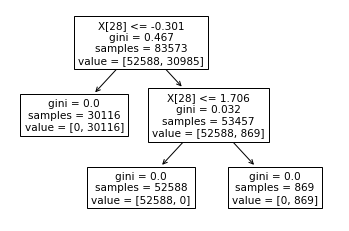

In [43]:
tree.plot_tree(tree_model)

In [2]:
df1 = pd.read_csv("data/hotel_booking_updated.csv", index_col=0)
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_nights,total_children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,Transient,75.0,0,0,2015-07-01,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,Transient,75.0,0,0,2015-07-01,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,Transient,98.0,0,1,2015-07-01,2,0


In [3]:
#handling categorical features

le = preprocessing.LabelEncoder()
df1['hotel'] = le.fit_transform(df1['hotel'].astype('str'))
df1['arrival_date_month'] = le.fit_transform(df1['arrival_date_month'].astype('str'))
df1['meal'] = le.fit_transform(df1['meal'].astype('str'))
df1['country'] = le.fit_transform(df1['country'].astype('str'))
df1['market_segment'] = le.fit_transform(df1['market_segment'].astype('str'))
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'].astype('str'))
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'].astype('str'))
df1['assigned_room_type'] = le.fit_transform(df1['assigned_room_type'].astype('str'))
df1['deposit_type'] = le.fit_transform(df1['deposit_type'].astype('str'))
df1['customer_type'] = le.fit_transform(df1['customer_type'].astype('str'))
df1['arrival_date'] = le.fit_transform(df1['arrival_date'].astype('str'))


In [4]:
#The column "is_canceled" is our target variable, we set y as this column
X1 = df1.drop('is_canceled', axis = 1)

In [5]:
y1 = df1["is_canceled"]

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

In [7]:
#Standardisation

scaler = StandardScaler()

In [8]:
#We fit the scaler passing the training data but also request it transforms the data and returns it to a variable named "train_scaled"
train_scaled1 = scaler.fit_transform(X_train1)

In [9]:
#We then transform our test data with the same fitted scaler
test_scaled1 = scaler.transform(X_test1)

In [10]:

tree_model1 = DecisionTreeClassifier()

In [11]:
tree_model1.fit(train_scaled1, y_train1)

DecisionTreeClassifier()

In [12]:
print("Decision Tree training accuracy",accuracy_score(y_train1, tree_model1.predict(train_scaled1)))

Decision Tree training accuracy 0.9963863927344956


In [13]:
print("Decision Tree test accuracy",accuracy_score(y_test1, tree_model1.predict(test_scaled1)))

Decision Tree test accuracy 0.8547896250383896


In [14]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [15]:
scores = cross_val_score(tree_model1, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.85543178, 0.86041545, 0.85693944, 0.85635313, 0.86087612])

[Text(232.88823863357493, 214.91162790697675, 'X[21] <= 1.125\ngini = 0.467\nsamples = 83573\nvalue = [52588, 30985]'),
 Text(131.45908864401127, 209.85488372093022, 'X[1] <= -0.838\ngini = 0.407\nsamples = 73278\nvalue = [52438, 20840]'),
 Text(47.408761656972914, 204.79813953488372, 'X[1] <= -0.904\ngini = 0.217\nsamples = 18605\nvalue = [16296, 2309]'),
 Text(24.679878753444907, 199.74139534883722, 'X[26] <= 1.768\ngini = 0.168\nsamples = 13760\nvalue = [12485, 1275]'),
 Text(24.63572274469704, 194.6846511627907, 'X[12] <= 0.925\ngini = 0.191\nsamples = 11924\nvalue = [10649, 1275]'),
 Text(3.7819847878333577, 189.62790697674419, 'X[22] <= -0.616\ngini = 0.116\nsamples = 5089\nvalue = [4774, 315]'),
 Text(1.5423555868101977, 184.57116279069766, 'X[16] <= 1.668\ngini = 0.032\nsamples = 1603\nvalue = [1577, 26]'),
 Text(1.4981995780623325, 179.51441860465115, 'X[23] <= 0.009\ngini = 0.031\nsamples = 1602\nvalue = [1577, 25]'),
 Text(1.4540435693144673, 174.45767441860465, 'X[17] <= 0.

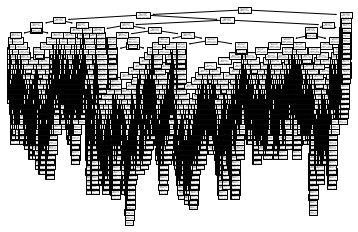

In [16]:

tree.plot_tree(tree_model1)